# Hierarchical matrices - H matrices

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

As matrizes de influência $\boldsymbol{H}$ e $\boldsymbol{G}$ para os elementos e pontos fontes dados será aproximada por polinômios de Lagrage e separação de variáveis. Essa é uma aproximação de baixo rank que será utilizada junto com a divisão binária baseada em matrizes hierárquicas para fazer a aproximação de blocos das matrizes de influência quando os pontos fontes se encontram distantes dos elementos.

In [2]:
LL = 1;
dx = LL/3;
dy = LL/3;
dz = LL/3;
# Coordenada dos nós que definem a geometria (nós geométricos)
# NOS = [número do nó, coord. x, coord. y, coord. z];
NOS_GEO = [ 1 0.0	 0.0	 0.0
        2 1*dx	 0.0	 0.0
        3 2*dx	 0.0	 0.0
        4 3*dx	 0.0	 0.0
        5 0.0	 1*dy	 0.0
        6 1*dx	 1*dy	 0.0
        7 2*dx	 1*dy	 0.0
        8 3*dx	 1*dy	 0.0
        9 0.0	 2*dy	 0.0
       10 1*dx	 2*dy	 0.0
       11 2*dx	 2*dy	 0.0
       12 3*dx	 2*dy	 0.0
       13 0.0	 3*dy	 0.0
       14 1*dx	 3*dy	 0.0
       15 2*dx	 3*dy	 0.0
       16 3*dx	 3*dy	 0.0

       17 0.0	 0.0	 1*dz
       18 1*dx	 0.0	 1*dz
       19 2*dx	 0.0	 1*dz
       20 3*dx	 0.0	 1*dz
       21 0.0	 1*dy	 1*dz
       22 3*dx	 1*dy	 1*dz
       23 0.0	 2*dy	 1*dz
       24 3*dx	 2*dy	 1*dz
       25 0.0	 3*dy	 1*dz
       26 1*dx	 3*dy	 1*dz
       27 2*dx	 3*dy	 1*dz
       28 3*dx	 3*dy	 1*dz

       29 0.0	 0.0	 2*dz
       30 1*dx	 0.0	 2*dz
       31 2*dx	 0.0	 2*dz
       32 3*dx	 0.0	 2*dz
       33 0.0	 1*dy	 2*dz
       34 3*dx	 1*dy	 2*dz
       35 0.0	 2*dy	 2*dz
       36 3*dx	 2*dy	 2*dz
       37 0.0	 3*dy	 2*dz
       38 1*dx	 3*dy	 2*dz
       39 2*dx	 3*dy	 2*dz
       40 3*dx	 3*dy	 2*dz

       41 0.0	 0.0	 3*dz
       42 1*dx	 0.0	 3*dz
       43 2*dx	 0.0	 3*dz
       44 3*dx	 0.0	 3*dz
       45 0.0	 1*dy	 3*dz
       46 1*dx	 1*dy	 3*dz
       47 2*dx	 1*dy	 3*dz
       48 3*dx	 1*dy	 3*dz
       49 0.0	 2*dy	 3*dz
       50 1*dx	 2*dy	 3*dz
       51 2*dx	 2*dy	 3*dz
       52 3*dx	 2*dy	 3*dz
       53 0.0	 3*dy	 3*dz
       54 1*dx	 3*dy	 3*dz
       55 2*dx	 3*dy	 3*dz
       56 3*dx	 3*dy	 3*dz];

# Matriz de conectividade (nós que definem os elementos)
# ELEM = [número do elemento, no1, no2, no3, face]
ELEM = [ 1     5     6     1     1
         2     1     6     2     1
         3     2     6     7     1
         4     2     7     3     1
         5     3     7     8     1
         6     3     8     4     1
         7     5     9    10     1
         8     5    10     6     1
         9     6    10    11     1
        10     6    11     7     1
        11     7    11    12     1
        12     7    12     8     1
        13     9    13    14     1
        14     9    14    10     1
        15    10    14    15     1
        16    10    15    11     1
        17    11    15    16     1
        18    11    16    12     1

        19    42    46    41     6
        20    41    46    45     6
        21    42    43    47     6
        22    42    47    46     6
        23    43    44    48     6
        24    43    48    47     6
        25    45    46    50     6
        26    45    50    49     6
        27    46    47    51     6
        28    46    51    50     6
        29    47    48    52     6
        30    47    52    51     6
        31    49    50    54     6
        32    49    54    53     6
        33    50    51    55     6
        34    50    55    54     6
        35    51    52    56     6
        36    51    56    55     6

        37     1    17    21     5
        38     1    21     5     5
        39     5    21    23     5
        40     5    23     9     5
        41     9    23    25     5
        42     9    25    13     5
        43    17    29    33     5
        44    17    33    21     5
        45    21    33    35     5
        46    21    35    23     5
        47    23    35    37     5
        48    23    37    25     5
        49    29    41    45     5
        50    29    45    33     5
        51    33    45    49     5
        52    33    49    35     5
        53    35    49    53     5
        54    35    53    37     5

        55     1     2    18     2
        56     1    18    17     2
        57     2     3    19     2
        58     2    19    18     2
        59     3     4    20     2
        60     3    20    19     2
        61    17    18    30     2
        62    17    30    29     2
        63    18    19    31     2
        64    18    31    30     2
        65    19    20    32     2
        66    19    32    31     2
        67    29    30    42     2
        68    29    42    41     2
        69    30    31    43     2
        70    30    43    42     2
        71    31    32    44     2
        72    31    44    43     2

        73     4     8    22     3
        74     4    22    20     3
        75     8    12    24     3
        76     8    24    22     3
        77    12    16    28     3
        78    12    28    24     3
        79    20    22    34     3
        80    20    34    32     3
        81    22    24    36     3
        82    22    36    34     3
        83    24    28    40     3
        84    24    40    36     3
        85    32    34    48     3
        86    32    48    44     3
        87    34    36    52     3
        88    34    52    48     3
        89    36    40    56     3
        90    36    56    52     3

        91    13    25    26     4
        92    13    26    14     4
        93    14    26    27     4
        94    14    27    15     4
        95    15    27    28     4
        96    15    28    16     4
        97    25    37    38     4
        98    25    38    26     4
        99    26    38    39     4
       100    26    39    27     4
       101    27    39    40     4
       102    27    40    28     4
       103    37    53    54     4
       104    37    54    38     4
       105    38    54    55     4
       106    38    55    39     4
       107    39    55    56     4
       108    39    56    40     4];

# Matriz de condições de contorno das faces
# CCFace = [número da face, tipo da CDC, valor da CDC]
# tipo da CDC = 0 => a temperatura é conhecida
# tipo da CDC = 1 => o fluxo é conhecido
CCFace = [1 0 0 
          2 1 0
          3 1 0
          4 1 0
          5 1 0
          6 0 0.5];

#b2 = [ELEM[i,1] for i in ELEM[:,1]]
b2 = [ELEM[i,1] for i in ELEM[:,1] if ELEM[i,5]==4]
b3 = [i for i in ELEM[b2,2:4]]
# Fontes concentradas
# fc = [Intensidade da fonte, Coord. X, Coord. Y, Coord. Z]
# a matriz fc suporta múltiplas fontes concentradas; uma por linha da
# matriz
fc = [0 LL/2 LL/2 LL/2];

CW = 343; # Velocidade do som
FR = 1.; # Frequencia estudada
AFR = 1;
npint = 1;
#println(b2)
b4 = reshape(b3,size(b3,1)*size(b3,2));

In [3]:
PONTOS_dom1 = [];
passo = 0.05;
[append!(PONTOS_dom1,[i*passo -10 j*passo] for i=1:10,j=1:10)];
[append!(PONTOS_dom1,[i*passo -7 j*passo] for i=1:10,j=1:10)];
PONTOS_dom = zeros(size(PONTOS_dom1,1),3);
[PONTOS_dom[i,:] = PONTOS_dom1[i] for i = 1:size(PONTOS_dom1,1)];
b1 = collect(1:size(PONTOS_dom,1));

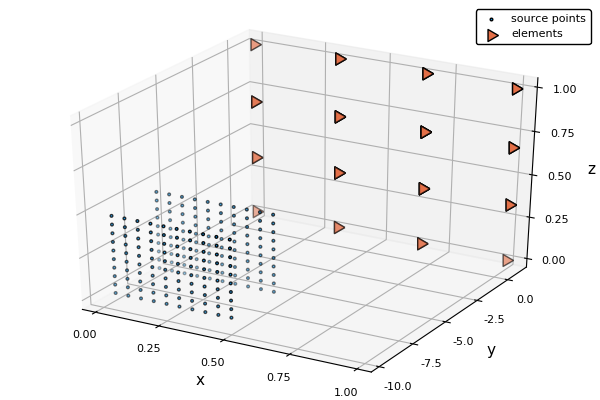

In [4]:
pyplot()
plot(PONTOS_dom[:,1],PONTOS_dom[:,2],PONTOS_dom[:,3],line=0,marker=(2,2.0,:o),label="source points")
plot!(NOS_GEO[b4,2],NOS_GEO[b4,3],NOS_GEO[b4,4],label="elements",xlabel="x",ylabel="y",zlabel="z",line=0,marker=(2,10.0,:>))

In [5]:
function criapontosinterp(n)
    x= cos.((2. .*(1:n) .-1).*pi./2. ./n)
end

criapontosinterp (generic function with 1 method)

In [6]:
function Gauss_Legendre(x1,x2,n)
x = zeros(n);
w = zeros(n);
pp=0;
eps=3e-14;
m=round(Int,(n+1)/2);
xm=.5*(x2+x1);
xl=.5*(x2-x1);
for i=1:m
    z=cos(pi*(i-.25)/(n+.5));
    while 1==1
        p1=1.;
        p2=0.;
        for j=1:n
            p3=p2;
            p2=p1;
            p1=((2*j-1)*z*p2-(j-1)*p3)/j;
        end
        pp=n*(z*p1-p2)/(z*z-1);
        z1=z;
        z=z1-p1/pp;
        if(abs(z-z1)<eps)
            break
        end
    end
    x[i]=xm-xl*z;
    x[n+1-i]=xm+xl*z;
    w[i]=2*xl/((1-z*z)*pp*pp);
    w[n+1-i]=w[i];
end 
return x,w
end

Gauss_Legendre (generic function with 1 method)

In [7]:
function calc_fforma(qsi)                                 
  N1=1. /2. .*(1. .-qsi);
  N2=1. /2. .*(1. .+qsi);
return N1,N2
end                                                                       
function calc_fformatri(qsi,eta)
    N1 = qsi;                                                             
    N2 = eta;                                                             
    N3 = 1 .-qsi .-eta;                                                                      
return N1,N2,N3                                                           
end 
function calc_dfforma(qsi, eta)
dNdqsi = [1 0 -1]
dNdeta = [0 1 -1]
return dNdqsi, dNdeta
end

calc_dfforma (generic function with 1 method)

In [8]:
function calc_jacobiano(x1,y1,z1,x2,y2,z2,x3,y3,z3,qsi,eta)
dNdqsi, dNdeta = calc_dfforma(qsi,eta);
dxdqsi = x1 .*dNdqsi[1].+ x2.*dNdqsi[2].+x3.*dNdqsi[3]
dydqsi = y1.*dNdqsi[1].+y2.*dNdqsi[2].+y3.*dNdqsi[3]
dzdqsi = z1.*dNdqsi[1].+z2.*dNdqsi[2].+z3.*dNdqsi[3]

dxdeta = x1.*dNdeta[1].+x2.*dNdeta[2].+x3.*dNdeta[3]
dydeta = y1.*dNdeta[1].+y2.*dNdeta[2].+y3.*dNdeta[3]
dzdeta = z1.*dNdeta[1].+z2.*dNdeta[2].+z3.*dNdeta[3]

g1 = dydqsi.*dzdeta .- dzdqsi.*dydeta;
g2 = dzdqsi.*dxdeta .- dxdqsi.*dzdeta;
g3 = dxdqsi.*dydeta .- dydqsi.*dxdeta;
J = sqrt(g1.^2.0 + g2.^2.0 + g3.^2.0);

return J
end

calc_jacobiano (generic function with 1 method)

In [9]:
function calc_vetnormal(x1,y1,z1,x2,y2,z2,x3,y3,z3)
    v1 = [x3,y3,z3] .- [x2,y2,z2];
    v2 = [x1,y1,z1] .- [x2,y2,z2];
    n = cross(v1, v2);
    if sum(abs.(n)) > 0.000001
        n = n./norm(n);
    end
    return n
end

calc_vetnormal (generic function with 1 method)

In [10]:
function lagrange(pg,x,n)
    ni = length(pg);
    L = ones(ni,n);
    for j = 1:n
        for i = 1:n
            if (i != j)
                L[:,j] = L[:,j].*(pg .- x[i])/(x[j]-x[i]);
            end
        end
    end
    return L
end

function lagrange(pg,x1,n1,x2,n2)
    l1=lagrange(pg[:,1],x1,n1)
    l2=lagrange(pg[:,2],x2,n2)
    ni=size(pg,1)
    L=zeros(ni,n1*n2)
    for i=1:ni
        L[i,:]=(l1[i,:]*l2[i,:]')[:]
    end
    L
end

function lagrange(pg,x1,n1,x2,n2,x3,n3)                                   
    l1=lagrange(pg[:,1:2],x1,n1,x2,n2)                                    
    l2=lagrange(pg[:,3],x3,n3)                                                                          
    ni=size(pg,1)                                                         
    L=zeros(ni,n1*n2*n3)                                                  
    for i=1:ni                                                            
        L[i,:]=(l1[i,:]*l2[i,:]')[:]                                      
    end                                                                   
    L                                                                     
end 

lagrange (generic function with 3 methods)

In [11]:
function calc_solfund(x,y,z,xd,yd,zd,n,k)
    # Evaluates the fundamental solutions of the Helmholtz equation.
    # Determine the distance between source and field points
    rx=x-xd;
    ry=y-yd;
    rz=z-zd;
    r =sqrt(rx^2+ry^2+rz^2);
    ZW=complex(0.,k*r);
    U=exp(ZW)/complex(4*pi*r,0.); # Fundamental solution for the velocity potential
    drdn=(rx*n[1] + ry*n[2] + rz*n[3])/r;	# Unit normal derivative of the distance
    Q=(ZW-complex(1.,0.))*U*complex(drdn/r,0.); # Fundamental solution for the flux
    return U,Q
end
function calc_solfund_POT(x,y,z,xd,yd,zd,n,k)
    rx=x-xd;
    ry=y-yd;
    rz=z-zd;
    r =sqrt(rx^2+ry^2+rz^2);
    Tast = 1.0/(4.0*pi*r);
    qast = (rx*n[1] + ry*n[2] + rz*n[3])/(4.0*pi*r^3.0);
    return Tast, qast
end

calc_solfund_POT (generic function with 1 method)

In [12]:
function calcula_HeGns_POT(x1,y1,z1,x2,y2,z2,x3,y3,z3,xd,yd,zd,n,qsil,w,k)
    n_pint=length(qsil);
    eta = qsil;
    rho = w;
    Tast = complex(0,0);
    qast = complex(0,0);
    g=0;
    h=0;
    for l=1:n_pint 
        for m=1:n_pint

            qsi=(1-eta[l])*qsil[m];
            N1,N2,N3=calc_fformatri(qsi,eta[l]);
            x=N1*x1+N2*x2+N3*x3;
            y=N1*y1+N2*y2+N3*y3;
            z=N1*z1+N2*z2+N3*z3;

            dNdqsi = [1; 0; -1];
            dNdeta = [0; 1; -1];

            dxdqsi = x1*dNdqsi[1]+x2*dNdqsi[2]+x3*dNdqsi[3];
            dydqsi = y1*dNdqsi[1]+y2*dNdqsi[2]+y3*dNdqsi[3];
            dzdqsi = z1*dNdqsi[1]+z2*dNdqsi[2]+z3*dNdqsi[3];
            dxdeta = x1*dNdeta[1]+x2*dNdeta[2]+x3*dNdeta[3];
            dydeta = y1*dNdeta[1]+y2*dNdeta[2]+y3*dNdeta[3];
            dzdeta = z1*dNdeta[1]+z2*dNdeta[2]+z3*dNdeta[3];

            g1 = dydqsi*dzdeta - dzdqsi*dydeta;
            g2 = dzdqsi*dxdeta - dxdqsi*dzdeta;
            g3 = dxdqsi*dydeta - dydqsi*dxdeta;
            J = sqrt(g1^2.0 + g2^2.0 + g3^2.0);

            Tast,qast=calc_solfund_POT(x,y,z,xd,yd,zd,n,k);

            h=h+qast*(1-eta[l])*rho[l]*w[m]*J;
            g=g+Tast*(1-eta[l])*rho[l]*w[m]*J;

        end
    end
    return g,h
end

calcula_HeGns_POT (generic function with 1 method)

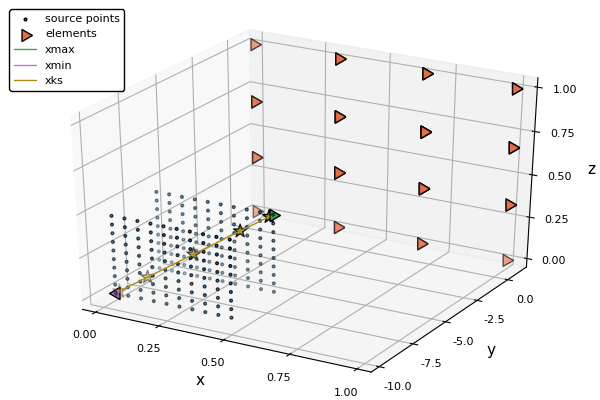

In [13]:
xmax=zeros(1,3)
xmin=zeros(1,3)
xmax[1]=maximum(PONTOS_dom[b1,1])
xmin[1]=minimum(PONTOS_dom[b1,1])
xmax[2]=maximum(PONTOS_dom[b1,2])
xmin[2]=minimum(PONTOS_dom[b1,2])
xmax[3]=maximum(PONTOS_dom[b1,3])
xmin[3]=minimum(PONTOS_dom[b1,3])
npg=5
xi,w=Gauss_Legendre(-1,1,npg)
ninterp = 5
xs=criapontosinterp(ninterp)
xint=zeros(ninterp*ninterp*ninterp,3)
n1,n2=calc_fforma(xs)
xks=n1 .*xmax .+ n2 .*xmin
plot(PONTOS_dom[:,1],PONTOS_dom[:,2],PONTOS_dom[:,3],line=0,marker=(2,2.0,:o),label="source points")
plot!(NOS_GEO[b4,2],NOS_GEO[b4,3],NOS_GEO[b4,4],label="elements",xlabel="x",ylabel="y",zlabel="z",line=0,marker=(2,10.0,:>))
#plot!(NOS_GEO[:,1],NOS_GEO[:,2],NOS_GEO[:,3],label="elements")
plot!([xmax[1]],[xmax[2]],[xmax[3]],marker=(2,10.0,:>),label="xmax",xlabel="x",ylabel="y",zlabel="z")
plot!([xmin[1]],[xmin[2]],[xmin[3]],marker=(2,10.0,:<),label="xmin")
plot!(xks[:,1],xks[:,2],xks[:,3],marker=(2,10.0,:s),label="xks")
#plot!(reverse(xks[:,1],dims=1),xks[:,2],xks[:,3],marker=(2,10.0,:s),label="xks")
#plot!(reverse(xks[:,1],dims=1),reverse(xks[:,2],dims=1),xks[:,3],marker=(2,10.0,:s),label="xks")
#plot!(xks[:,1],reverse(xks[:,2],dims=1),xks[:,3],marker=(2,10.0,:s),label="xks")

In [14]:
ϵ=1e-6
GG = (zeros(ninterp*ninterp*ninterp,length(b2)))      # Dimensiona matriz G
HH = (zeros(ninterp*ninterp*ninterp,length(b2)))      # Dimensiona matriz H
npg=5
qsi,w=Gauss_Legendre(-1,1,npg)
xmax=zeros(1,3)
xmin=zeros(1,3)
xmax[1]=maximum(PONTOS_dom[b1,1])
xmin[1]=minimum(PONTOS_dom[b1,1])
xmax[2]=maximum(PONTOS_dom[b1,2])
xmin[2]=minimum(PONTOS_dom[b1,2])
xmax[3]=maximum(PONTOS_dom[b1,3])
xmin[3]=minimum(PONTOS_dom[b1,3])
ninterp = 5
xs=criapontosinterp(ninterp)
xint=zeros(ninterp*ninterp*ninterp,3)
n1,n2=calc_fforma(xs)
xks=n1 .*xmax .+ n2 .*xmin
xyz = zeros(ninterp*ninterp*ninterp,3)      # Dimensiona matriz H
k=1
ci=0
for i3 =1:ninterp # Laco sobre os pontos fontes
for i2 =1:ninterp # Laco sobre os pontos fontes
    for i1 =1:ninterp # Laco sobre os pontos fontes
        ci+=1
        xd=xks[i1,1]; # Coordenada x do ponto fonte
        yd=xks[i2,2]; # Coordenada y do ponto fonte
        zd=xks[i3,3]; # Coordenada y do ponto fonte
        xyz[ci,:]=[xd yd zd]
        xint[ci,:]=[xd yd zd]
        cj=0       
        for j in b2 # Laco sobre os elementos
            cj+=1
            no1::Int64=ELEM[j,2]; # Ponto inicial do elemento
            no2::Int64=ELEM[j,3]; # Ponto final do elemento
            no3::Int64=ELEM[j,4]; # Ponto final do elemento
            x1=NOS_GEO[no1,2]; # Coordenada x do ponto inicial do elemento
            x2=NOS_GEO[no2,2]; # Coordenada x do ponto final do elemento
            x3=NOS_GEO[no3,2]; # Coordenada x do ponto final do elemento
            y1=NOS_GEO[no1,3]; # Coordenada y do ponto inicial do elemento
            y2=NOS_GEO[no2,3];  # Coordenada y do ponto final do elemento
            y3=NOS_GEO[no3,3];  # Coordenada y do ponto final do elemento
            z1=NOS_GEO[no1,4]; # Coordenada z do ponto inicial do elemento
            z2=NOS_GEO[no2,4];  # Coordenada  do ponto final do elemento
            z3=NOS_GEO[no3,4];  # Coordenada z do ponto final do elemento
            n = calc_vetnormal(x1,y1,z1,x2,y2,z2,x3,y3,z3); 
            g=0
            h=0
            for l =1:npg
            for m =1:npg
                eta = (1 - qsi[l])*qsi[m]
                N =calc_fformatri(eta,qsi[l]); #  fun��es de forma
                x=N[1]*x1+N[2]*x2+N[3]*x3; # coordenada x do ponto de integra��o
                y=N[1]*y1+N[2]*y2+N[3]*y3 # coordenada y do ponto de integra��o
                z=N[1]*z1+N[2]*z2+N[3]*z3; # coordenada z do ponto de integra��o
                J = calc_jacobiano(x1,y1,z1,x2,y2,z2,x3,y3,z3,eta,qsi[m]);# jacobiano
                Tast,qast=calc_solfund_POT(x,y,z,xd,yd,zd,n,k); # Solu��es
                g=g+Tast*complex((1-qsi[l])*w[l]*w[m]*J,0); # Integral da matriz G
                h=h+qast*complex((1-qsi[l])*w[l]*w[m]*J,0); # Integral da matriz H
            end
            end
            GG[ci,cj] = g
            HH[ci,cj] = h
        end
    end
end
end
if abs(xmax[1]-xmin[1])<ϵ && abs(xmax[2]-xmin[2])>=ϵ && abs(xmax[3]-xmin[3])>=ϵ
    fontes=[(2. .*(PONTOS_dom[b1,2] .-xmin[2])./(xmax[2]-xmin[2]).-1) (2. .*(PONTOS_dom[b1,3] .-xmin[3])./(xmax[3]-xmin[3]).-1)];
    LL=lagrange(fontes,xs,ninterp,xs,ninterp);
    L=[LL LL]./2;
elseif abs(xmax[2]-xmin[2])<ϵ && abs(xmax[1]-xmin[1])>=ϵ && abs(xmax[3]-xmin[3])>=ϵ
    fontes=(2. .*(PONTOS_dom[b1,1] .-xmin[1])./(xmax[1]-xmin[1]).-1);
    LL=lagrange(fontes,xs,ninterp,xs,ninterp);
    L=[LL LL]./2;
elseif abs(xmax[3]-xmin[3])<ϵ && abs(xmax[2]-xmin[2])>=ϵ && abs(xmax[1]-xmin[1])>=ϵ
    fontes=(2. .*(PONTOS_dom[b1,1] .-xmin[1])./(xmax[1]-xmin[1]).-1);
    LL=lagrange(fontes,xs,ninterp,xs,ninterp);
    L=[LL LL]./2;
elseif abs(xmax[2]-xmin[2])<ϵ && abs(xmax[3]-xmin[3]) < ϵ && abs(xmax[1]-xmin[1])>=ϵ
    fontes=(2. .*(PONTOS_dom[b1,1] .-xmin[1])./(xmax[1]-xmin[1]).-1);
    LL=lagrange(fontes,xs,ninterp);
    L=[LL LL LL]./3;
elseif abs(xmax[2]-xmin[2])<ϵ && abs(xmax[1]-xmin[1]) < ϵ && abs(xmax[2]-xmin[2])>=ϵ
    fontes=(2. .*(PONTOS_dom[b1,3] .-xmin[3])./(xmax[3]-xmin[3]).-1);
    LL=lagrange(fontes,xs,ninterp);
    L=[LL LL LL]./3;
elseif abs(xmax[1]-xmin[1])<ϵ && abs(xmax[3]-xmin[3]) < ϵ && abs(xmax[2]-xmin[2])>=ϵ
    fontes=(2. .*(PONTOS_dom[b1,2] .-xmin[2])./(xmax[2]-xmin[2]).-1);
    LL=lagrange(fontes,xs,ninterp);
    L=[LL LL LL]./3;
else
    fontes=[(2. .*(PONTOS_dom[b1,1] .- xmin[1]) ./(xmax[1]-xmin[1]).-1) (2. .*(PONTOS_dom[b1,2] .-xmin[2])./(xmax[2]-xmin[2]).-1)  (2. .*(PONTOS_dom[b1,3] .-xmin[3])./(xmax[3]-xmin[3]).-1)];
    L=lagrange(fontes,xs,ninterp,xs,ninterp,xs,ninterp);
    end;
#L=reverse(L,dims=1);
#L=L[end:-1:1,end:-1:1];
L=flipdim(L,1);
#println("L*xyz (x y z) | PONTOS_dom (x y z)")
#[L*xyz PONTOS_dom]

In [15]:
nnos = length(b1);
nelem = length(b2)
G=zeros(nnos,nelem); 
H=zeros(nnos,nelem);     
ci=0
for i in b1
    ci+=1
    xd=PONTOS_dom[i,1]; 
    yd=PONTOS_dom[i,2]; 
    zd=PONTOS_dom[i,3];
    cj=0
    for j in b2
        cj+=1
        nos = ELEM[j,2:4];
        no1=ELEM[j,2]; 
        no2=ELEM[j,3]; 
        no3=ELEM[j,4]; 
   
        x1=NOS_GEO[no1,2]; 
        y1=NOS_GEO[no1,3]; 
        z1=NOS_GEO[no1,4]; 
        
        x2=NOS_GEO[no2,2]; 
        y2=NOS_GEO[no2,3]; 
        z2=NOS_GEO[no2,4]; 
        
        x3=NOS_GEO[no3,2]; 
        y3=NOS_GEO[no3,3]; 
        z3=NOS_GEO[no3,4]; 
        
        n = calc_vetnormal(x1,y1,z1,x2,y2,z2,x3,y3,z3); 
        
        G[ci,cj],H[ci,cj]=calcula_HeGns_POT(x1,y1,z1,x2,y2,z2,x3,y3,z3,xd,yd,zd,n,qsi,w,k); 
    end
end

In [16]:
GH = L*GG
println("GH  G  (GH-G)")
[GH[:,1] G[:,1] GH[:,1].-G[:,1]]

GH  G  (GH-G)


200×3 Array{Float64,2}:
 0.00320987  0.00320985   1.94496e-8
 0.00321036  0.00321034   1.9529e-8 
 0.00321078  0.00321076   1.95977e-8
 0.00321114  0.00321112   1.96557e-8
 0.00321142  0.0032114    1.97027e-8
 0.00321165  0.00321163   1.97387e-8
 0.0032118   0.00321178   1.97637e-8
 0.00321189  0.00321187   1.97777e-8
 0.00321192  0.0032119    1.97806e-8
 0.00321188  0.00321186   1.97723e-8
 0.00321021  0.00321019   1.95048e-8
 0.0032107   0.00321068   1.95846e-8
 0.00321112  0.0032111    1.96536e-8
 ⋮                                  
 0.00441453  0.00441456  -2.73358e-8
 0.00441442  0.00441445  -2.73255e-8
 0.00440873  0.00440876  -2.67635e-8
 0.00440999  0.00441002  -2.68875e-8
 0.00441108  0.00441111  -2.69944e-8
 0.004412    0.00441203  -2.7085e-8 
 0.00441275  0.00441278  -2.71591e-8
 0.00441333  0.00441336  -2.72166e-8
 0.00441374  0.00441377  -2.72572e-8
 0.00441398  0.004414    -2.72806e-8
 0.00441404  0.00441407  -2.72871e-8
 0.00441394  0.00441397  -2.7277e-8 

In [17]:
println("GH  G  (GH-G)")
[GH[:,2] G[:,2] GH[:,2].-G[:,2]]

GH  G  (GH-G)


200×3 Array{Float64,2}:
 0.00321255  0.00321253   1.98856e-8
 0.0032129   0.00321288   1.99435e-8
 0.00321317  0.00321315   1.99902e-8
 0.00321338  0.00321336   2.00259e-8
 0.00321352  0.0032135    2.00502e-8
 0.0032136   0.00321358   2.00634e-8
 0.00321361  0.00321359   2.00653e-8
 0.00321356  0.00321354   2.00559e-8
 0.00321344  0.00321342   2.00352e-8
 0.00321325  0.00321323   2.00033e-8
 0.00321231  0.00321229   1.98438e-8
 0.00321265  0.00321263   1.99015e-8
 0.00321293  0.00321291   1.99482e-8
 ⋮                                  
 0.00440628  0.00440631  -2.65154e-8
 0.0044058   0.00440583  -2.64684e-8
 0.00440202  0.00440204  -2.60986e-8
 0.00440289  0.00440292  -2.61837e-8
 0.0044036   0.00440363  -2.62522e-8
 0.00440414  0.00440417  -2.63044e-8
 0.00440451  0.00440454  -2.63403e-8
 0.00440471  0.00440473  -2.63597e-8
 0.00440474  0.00440476  -2.63624e-8
 0.00440459  0.00440462  -2.63486e-8
 0.00440428  0.00440431  -2.63183e-8
 0.0044038   0.00440383  -2.62715e-8

In [18]:
L1 = []
#L1 = L[end:-1:1,end:-1:1];
L1 = flipdim(L,1)

200×125 Array{Float64,2}:
  3.17854e-5   -0.000102254   0.000200685  …  -0.625892      2.0135     
 -3.4695e-5     0.000114996  -0.000249564      1.31343       0.550078   
  8.03386e-6   -2.77157e-5    7.05043e-5       1.56241      -0.0486327  
  4.78863e-5   -0.000174811   0.0005971        1.00561      -0.158221   
  3.08504e-5   -0.000122748   0.000954363      0.285994     -0.0619944  
 -3.90124e-5    0.000179973   0.000954363  …  -0.195059      0.0490242  
 -9.95667e-5    0.000632816   0.0005971       -0.277791      0.0760959  
 -3.0604e-5     0.000983207   7.05043e-5      -0.0440428     0.0127666  
  0.000346158   0.00082653   -0.000249564      0.18274      -0.0551336  
  0.00126708   -0.000393867   0.000200685     -0.162492      0.05051    
 -3.4695e-5     0.000111614  -0.000219055  …  -0.17099       0.550078   
  3.78709e-5   -0.000125523   0.000272409      0.358823      0.150278   
 -8.76927e-6    3.02527e-5   -7.69582e-5       0.426842     -0.0132862  
  ⋮                      

In [19]:
L[end,1]

3.1785388929051415e-5